<a href="https://colab.research.google.com/github/Sreenidhiangadi/OIBSIP/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the name of your uploaded CSV file
file_path = '/content/' + 'Unemployment in India.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
data.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#check if this dataset contains missing values or not:
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


<ipython-input-9-1a81537a1f1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

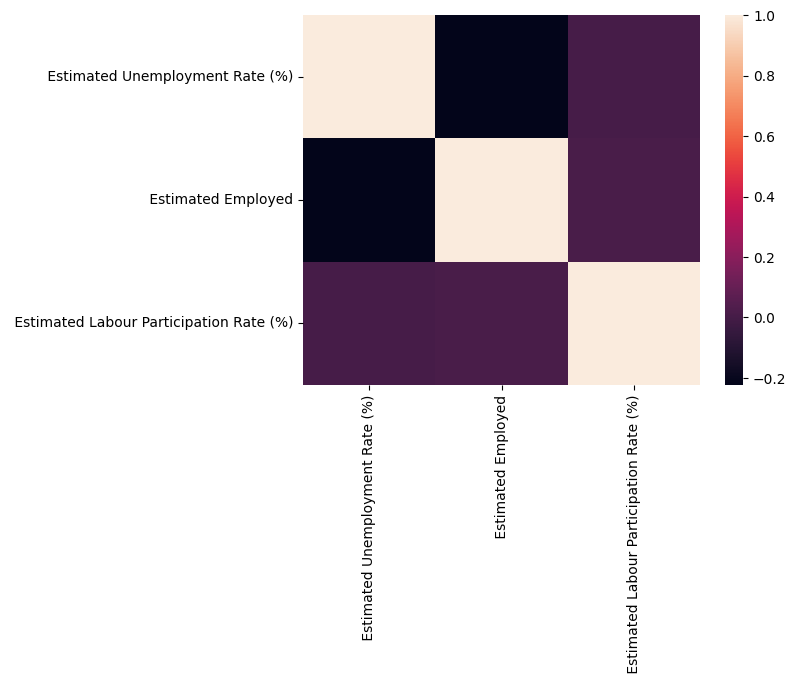

In [ ]:
#correlation between the features of this dataset:
corr=data.corr()
sns.heatmap(data=corr)

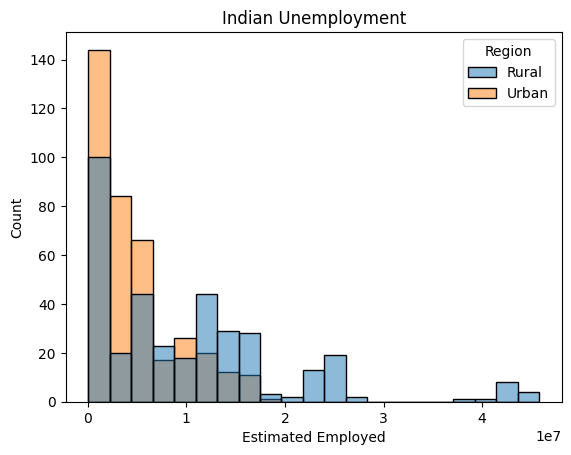

In [ ]:
data.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed",hue="Region",data=data)
plt.show()

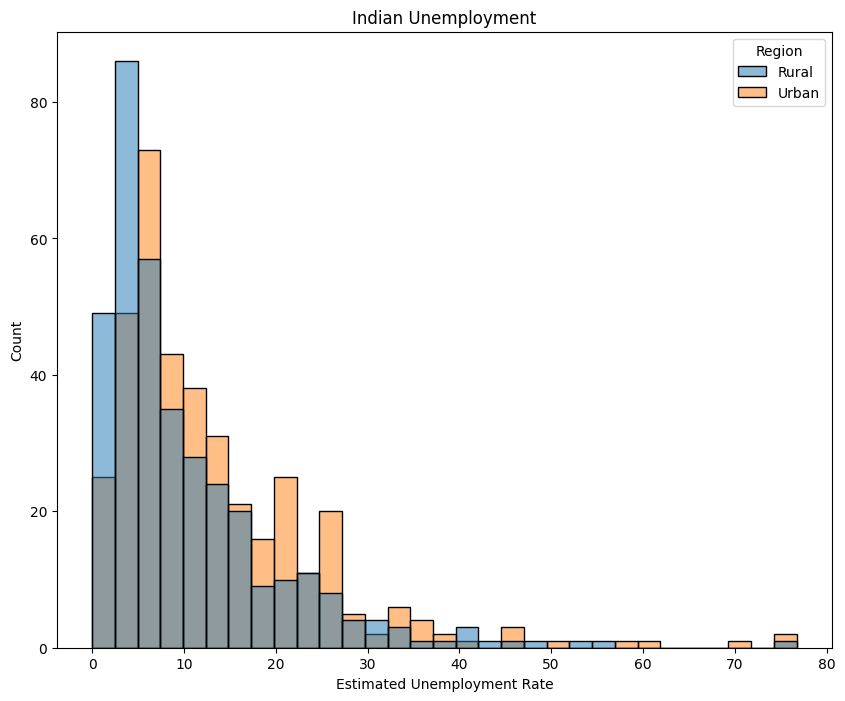

In [ ]:
#unemployment rate according to different regions of
plt.figure(figsize=(10,8))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue="Region",data=data)
plt.show()

In [ ]:
data.describe

<bound method NDFrame.describe of              States         Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh   31-05-2019   Monthly                         3.65   
1    Andhra Pradesh   30-06-2019   Monthly                         3.05   
2    Andhra Pradesh   31-07-2019   Monthly                         3.75   
3    Andhra Pradesh   31-08-2019   Monthly                         3.32   
4    Andhra Pradesh   30-09-2019   Monthly                         5.17   
..              ...          ...       ...                          ...   
763             NaN          NaN       NaN                          NaN   
764             NaN          NaN       NaN                          NaN   
765             NaN          NaN       NaN                          NaN   
766             NaN          NaN       NaN                          NaN   
767             NaN          NaN       NaN                          NaN   

     Estimated Employed  Estimated Labour Participation Rate Regi

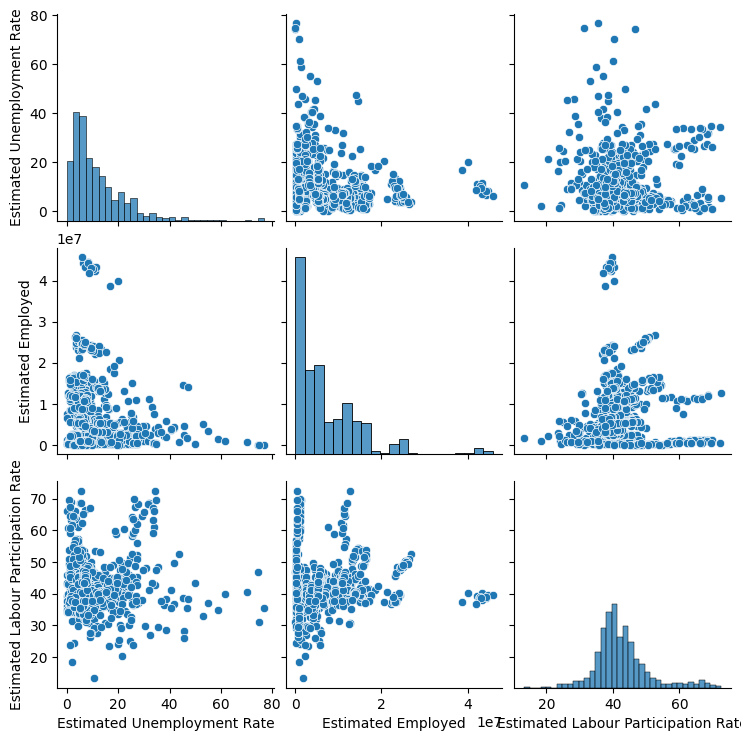

In [ ]:
sns.pairplot(data)

In [ ]:
x=data[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
y=data['Estimated Employed']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [ ]:
x_train

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
191,3.66,24843750.0,48.80
144,41.72,4280434.0,36.92
550,7.69,4448650.0,35.91
121,1.12,2230075.0,41.20
392,11.17,1595176.0,44.01
...,...,...,...
11,16.29,8792827.0,36.03
648,12.63,5176819.0,39.15
690,5.23,5338119.0,43.87
31,12.47,24053140.0,40.31


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import requests

# Define the endpoint for World Bank's API
url = 'https://api.worldbank.org/v2/country/IND/indicator/SL.UEM.TOTL.ZS?format=json'

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extract the relevant data
    unemployment_data = data[1]

    # Print the first few data points
    for entry in unemployment_data[:5]:
        print(f"Date: {entry['date']}, Unemployment Rate: {entry['value']}%")
else:
    print('Failed to retrieve data. Please check your connection or try again later.')


Date: 2022, Unemployment Rate: 7.33%
Date: 2021, Unemployment Rate: 7.713%
Date: 2020, Unemployment Rate: 10.195%
Date: 2019, Unemployment Rate: 6.51%
Date: 2018, Unemployment Rate: 7.65%
